In [1]:
from pprint import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import praw

user_agent = 'Scraper 1.0 by /u/Snoo-26441'
reddit = praw.Reddit(
    client_id = 'O9e0CmctRjs9XA',
    client_secret = 'LT5dalV7EA02zNaipnLGV9pkBCgnTg',
    user_agent = user_agent    
)

In [20]:
headlines= set()

for submission in reddit.subreddit('Marvel').hot(limit = None):#Marvel subredditine girer
    print(submission.title)
    print(submission.id)
    print(submission.author)
    print(submission.created_utc)
    print(submission.score)
    print(submission.upvote_ratio)
    print(submission.url)
    break
    
headlines.add(submission.title)
print('\n', len(headlines))    

This Week in Comics #13 - MAR 31 2021 - X-MEN #19, BETA RAY BILL #1, SILK #1, BLACK CAT #4, KING IN BLACK: GHOST RIDER #1, U.S. AGENT #4, CAPTAIN AMERICA #28
mgy0eh
tehawesomedragon
1617164547.0
35
1.0
https://www.reddit.com/r/Marvel/comments/mgy0eh/this_week_in_comics_13_mar_31_2021_xmen_19_beta/

 1


In [ ]:
headlines= set()

In [90]:
for submission in reddit.subreddit('Marvel').hot(limit = None):#Marvel subredditine girer
    headlines.add(submission.title)
print('\n', len(headlines))    


 993


In [91]:
df = pd.DataFrame(headlines, columns=['title'])
df.head()

,title
0,John Romita Jr. Returns To Marvel Comics
1,Spidey meeting Deadpool’s daughter (Spider-Man...
2,“No sister of mine may become involved with a ...
3,57 Years of Black Widow Oufits
4,My brother's (m11) drawing of carnage


In [92]:
df.to_csv('marvel-headlines.csv', header = True, encoding='utf-8', index = False)

In [93]:
import nltk

nltk.download('vader_lexicon')#sanırsam kelimelerin pozitif negatifliklerinin olduğu bir txt dosyası

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tolga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
result = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['line'] = line
    result.append(pol_score)
    
pprint(result[:3], width=100)

[{'compound': 0.4215,
  'line': 'John Romita Jr. Returns To Marvel Comics',
  'neg': 0.0,
  'neu': 0.682,
  'pos': 0.318},
 {'compound': 0.0,
  'line': 'Spidey meeting Deadpool’s daughter (Spider-Man/Deadpool (2016) #3)',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.5399,
  'line': '“No sister of mine may become involved with a robot! I am the head of our family — and '
          'I forbid you to love that thing!”',
  'neg': 0.085,
  'neu': 0.738,
  'pos': 0.177}]


In [95]:
df = pd.DataFrame.from_records(result)
df.head()

,neg,neu,pos,compound,line
0,0.000,0.682,0.318,0.4215,John Romita Jr. Returns To Marvel Comics
1,0.000,1.000,0.000,0.0000,Spidey meeting Deadpool’s daughter (Spider-Man...
2,0.085,0.738,0.177,0.5399,“No sister of mine may become involved with a ...
3,0.000,1.000,0.000,0.0000,57 Years of Black Widow Oufits
4,0.000,1.000,0.000,0.0000,My brother's (m11) drawing of carnage


In [96]:
df_Deneme = pd.DataFrame(result)
df_Deneme.head()

,neg,neu,pos,compound,line
0,0.000,0.682,0.318,0.4215,John Romita Jr. Returns To Marvel Comics
1,0.000,1.000,0.000,0.0000,Spidey meeting Deadpool’s daughter (Spider-Man...
2,0.085,0.738,0.177,0.5399,“No sister of mine may become involved with a ...
3,0.000,1.000,0.000,0.0000,57 Years of Black Widow Oufits
4,0.000,1.000,0.000,0.0000,My brother's (m11) drawing of carnage


In [102]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,line,label
0,0.000,0.682,0.318,0.4215,John Romita Jr. Returns To Marvel Comics,1
1,0.000,1.000,0.000,0.0000,Spidey meeting Deadpool’s daughter (Spider-Man...,0
2,0.085,0.738,0.177,0.5399,“No sister of mine may become involved with a ...,1
3,0.000,1.000,0.000,0.0000,57 Years of Black Widow Oufits,0
4,0.000,1.000,0.000,0.0000,My brother's (m11) drawing of carnage,0


In [103]:
df2 = df[['line','label']]
df2.head()

,line,label
0,John Romita Jr. Returns To Marvel Comics,1
1,Spidey meeting Deadpool’s daughter (Spider-Man...,0
2,“No sister of mine may become involved with a ...,1
3,57 Years of Black Widow Oufits,0
4,My brother's (m11) drawing of carnage,0


In [104]:
df2.to_csv('marvel-headlines-labels.csv', header = True, encoding = 'utf-8', index = False)

In [105]:
#df2.loc[df2['label'] == 1, 'label'] = 'Positive'

In [106]:
df.label.value_counts()

 0    494
 1    370
-1    129
Name: label, dtype: int64

In [109]:
df.label.value_counts(normalize=True) * 100 #yüzdesi

 0    49.748238
 1    37.260826
-1    12.990937
Name: label, dtype: float64

In [113]:
print('Positive Headlines \n')
pprint(list(df[df.label == 1].line[:5]), width = 200)

Positive Headlines 

['John Romita Jr. Returns To Marvel Comics',
 '“No sister of mine may become involved with a robot! I am the head of our family — and I forbid you to love that thing!”',
 'Found a page where two Visions talk about The Ship Of Theseus, like in WandaVision. (Avengers (2016) #6)',
 'Marvel Billboard featuring hero with special needs?',
 'I made Jack O Lantern in 3D, couldnt add fire but still turned out ok. Hope you like it!']


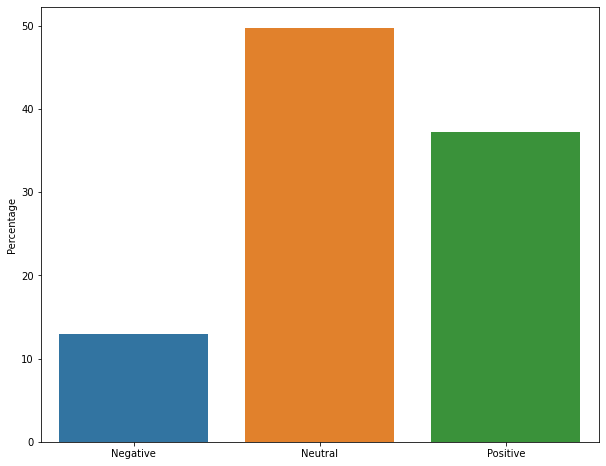

In [119]:
fig, ax = plt.subplots(figsize = (10,8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x = counts.index, y = counts, ax = ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')
plt.show()